In [94]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math
import optuna
import shap

from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import Ridge, LinearRegression, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder   
from sklearn.model_selection import StratifiedKFold


In [95]:

folder_path = 'TC-figure'

# 检查文件夹是否存在，如果不存在则创建它
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
    print(f"文件夹 {folder_path} 已创建。")

In [96]:
df = pd.read_csv("TC_填充.csv",  dtype={'DIPOCE': str, 'BA_Code': str, 'Cata_Code': str, 'FM_N': str})
df

,DIPOCE,DI_NCO,PO_HV,PO_f,BA_Code,BA_Mn,PO_Phr,BA_Phr,FS_Phr,Cata_Phr,...,R,CHS,AB_Mix_t,Q,Cata_Code,MCS,TC_Method,TC_T,Closed_CC,TC
0,110100000,31.0,367.991736,4.464132,1000,18.0,67.567568,2.182432,1.013514,1.013514,...,1.83,59.700000,5.05,0.0,100000,108.600,1,283.15,90.8,24.36
1,100010000,31.5,440.000000,3.426129,1000,18.0,50.676157,1.494662,1.010676,0.455516,...,1.10,58.400000,10.00,0.0,100100,310.000,1,297.15,88.9,28.74
2,100100100,31.5,429.326712,3.644699,1000,18.0,32.931727,0.975330,0.659782,0.295468,...,1.10,63.500000,10.00,0.0,100100,220.000,1,297.15,89.9,28.72
3,100100100,31.5,418.118624,3.664067,1000,18.0,30.906059,0.990550,0.617009,0.278488,...,1.10,64.600000,10.00,0.0,100100,210.000,1,297.15,84.2,28.59
4,100100100,31.5,406.184223,3.594375,1000,18.0,29.056604,0.862534,0.582210,0.264151,...,1.10,65.000000,10.00,0.0,100100,280.000,1,297.15,68.9,28.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,100010000,31.0,416.000000,2.000000,1000,18.0,73.421439,2.276065,1.101322,0.367107,...,1.10,57.662997,5.00,48.0,100000,269.211,1,283.15,20.4,37.01
284,100010000,31.0,416.000000,2.000000,1000,18.0,80.515298,1.328502,1.207729,0.402576,...,1.10,55.396967,5.00,48.0,100000,264.406,1,283.15,15.9,38.79
285,100010000,31.0,416.000000,2.000000,1000,18.0,84.104289,0.849453,1.261564,0.420521,...,1.10,54.317040,5.00,48.0,100000,264.088,1,283.15,19.5,39.74
286,100010000,31.0,416.000000,2.000000,1000,18.0,85.251492,0.699062,1.278772,0.426257,...,1.10,53.980672,5.00,48.0,100000,260.738,1,283.15,34.5,40.45


In [97]:
pad_lengths = {
    'DIPOCE': 10,    # 9位
    'BA_Code': 4,   # 4位
    'Cata_Code': 6  # 6位
}

for col, length in pad_lengths.items():
    df[col] = df[col].astype(str).str.zfill(length)
df

,DIPOCE,DI_NCO,PO_HV,PO_f,BA_Code,BA_Mn,PO_Phr,BA_Phr,FS_Phr,Cata_Phr,...,R,CHS,AB_Mix_t,Q,Cata_Code,MCS,TC_Method,TC_T,Closed_CC,TC
0,0110100000,31.0,367.991736,4.464132,1000,18.0,67.567568,2.182432,1.013514,1.013514,...,1.83,59.700000,5.05,0.0,100000,108.600,1,283.15,90.8,24.36
1,0100010000,31.5,440.000000,3.426129,1000,18.0,50.676157,1.494662,1.010676,0.455516,...,1.10,58.400000,10.00,0.0,100100,310.000,1,297.15,88.9,28.74
2,0100100100,31.5,429.326712,3.644699,1000,18.0,32.931727,0.975330,0.659782,0.295468,...,1.10,63.500000,10.00,0.0,100100,220.000,1,297.15,89.9,28.72
3,0100100100,31.5,418.118624,3.664067,1000,18.0,30.906059,0.990550,0.617009,0.278488,...,1.10,64.600000,10.00,0.0,100100,210.000,1,297.15,84.2,28.59
4,0100100100,31.5,406.184223,3.594375,1000,18.0,29.056604,0.862534,0.582210,0.264151,...,1.10,65.000000,10.00,0.0,100100,280.000,1,297.15,68.9,28.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,0100010000,31.0,416.000000,2.000000,1000,18.0,73.421439,2.276065,1.101322,0.367107,...,1.10,57.662997,5.00,48.0,100000,269.211,1,283.15,20.4,37.01
284,0100010000,31.0,416.000000,2.000000,1000,18.0,80.515298,1.328502,1.207729,0.402576,...,1.10,55.396967,5.00,48.0,100000,264.406,1,283.15,15.9,38.79
285,0100010000,31.0,416.000000,2.000000,1000,18.0,84.104289,0.849453,1.261564,0.420521,...,1.10,54.317040,5.00,48.0,100000,264.088,1,283.15,19.5,39.74
286,0100010000,31.0,416.000000,2.000000,1000,18.0,85.251492,0.699062,1.278772,0.426257,...,1.10,53.980672,5.00,48.0,100000,260.738,1,283.15,34.5,40.45


In [98]:

y = df['TC']

X = df.drop(["TC"], axis=1)
X

,DIPOCE,DI_NCO,PO_HV,PO_f,BA_Code,BA_Mn,PO_Phr,BA_Phr,FS_Phr,Cata_Phr,...,Yield,R,CHS,AB_Mix_t,Q,Cata_Code,MCS,TC_Method,TC_T,Closed_CC
0,0110100000,31.0,367.991736,4.464132,1000,18.0,67.567568,2.182432,1.013514,1.013514,...,96.884711,1.83,59.700000,5.05,0.0,100000,108.600,1,283.15,90.8
1,0100010000,31.5,440.000000,3.426129,1000,18.0,50.676157,1.494662,1.010676,0.455516,...,97.017857,1.10,58.400000,10.00,0.0,100100,310.000,1,297.15,88.9
2,0100100100,31.5,429.326712,3.644699,1000,18.0,32.931727,0.975330,0.659782,0.295468,...,97.377587,1.10,63.500000,10.00,0.0,100100,220.000,1,297.15,89.9
3,0100100100,31.5,418.118624,3.664067,1000,18.0,30.906059,0.990550,0.617009,0.278488,...,97.428971,1.10,64.600000,10.00,0.0,100100,210.000,1,297.15,84.2
4,0100100100,31.5,406.184223,3.594375,1000,18.0,29.056604,0.862534,0.582210,0.264151,...,97.478380,1.10,65.000000,10.00,0.0,100100,280.000,1,297.15,68.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,0100010000,31.0,416.000000,2.000000,1000,18.0,73.421439,2.276065,1.101322,0.367107,...,96.859603,1.10,57.662997,5.00,48.0,100000,269.211,1,283.15,20.4
284,0100010000,31.0,416.000000,2.000000,1000,18.0,80.515298,1.328502,1.207729,0.402576,...,98.229830,1.10,55.396967,5.00,48.0,100000,264.406,1,283.15,15.9
285,0100010000,31.0,416.000000,2.000000,1000,18.0,84.104289,0.849453,1.261564,0.420521,...,98.887437,1.10,54.317040,5.00,48.0,100000,264.088,1,283.15,19.5
286,0100010000,31.0,416.000000,2.000000,1000,18.0,85.251492,0.699062,1.278772,0.426257,...,99.089386,1.10,53.980672,5.00,48.0,100000,260.738,1,283.15,34.5


In [99]:
X.describe()

,DI_NCO,PO_HV,PO_f,BA_Mn,PO_Phr,BA_Phr,FS_Phr,Cata_Phr,f(H2O),M_loss,Yield,R,CHS,AB_Mix_t,Q,MCS,TC_Method,TC_T,Closed_CC
count,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000
mean,31.428969,445.861784,4.832867,35.312250,64.804417,5.316551,1.554504,1.166676,0.139696,8.748960,94.435063,1.205098,60.371090,12.179028,107.216684,314.602337,1.322917,296.497361,74.828916
std,0.622753,160.551599,2.153853,35.319136,20.032371,7.298612,0.495857,0.843963,0.077325,9.975629,6.475693,0.264846,8.035376,6.056124,235.723192,168.941604,0.771822,11.978471,22.458531
min,30.000000,211.000000,2.000000,0.000000,1.000000,0.000000,0.399489,0.000000,0.000000,0.000000,64.652956,0.800000,32.800000,5.000000,-48.000000,20.000000,0.000000,283.150000,9.000000
25%,31.000000,369.767920,3.358216,18.000000,52.427052,1.426130,1.257477,0.700000,0.101932,3.802985,95.589890,1.100000,55.500000,8.000000,0.000000,208.815250,1.000000,292.755000,67.422075
50%,31.250000,420.000000,4.567570,18.000000,62.575000,2.042140,1.525306,1.057000,0.134637,4.921485,96.884723,1.100000,61.000000,10.000000,10.261330,266.149000,1.000000,294.020000,84.275900
75%,31.500000,452.916428,5.603015,31.430089,78.907500,3.302786,1.850000,1.480000,0.183260,8.005650,97.699996,1.250000,64.912281,15.000000,92.512028,393.455500,1.000000,298.150000,89.912975
max,33.600000,1365.168399,16.000000,148.100000,126.000000,30.500000,4.300000,4.250000,0.278000,68.750000,100.000000,2.400000,76.784678,30.000000,1368.000000,900.000000,3.000000,343.150000,99.000000


In [100]:
params = {'iterations':1400,
            'depth': 5,
            'learning_rate': 0.016,
            'l2_leaf_reg': 3.4,
            'bagging_temperature': 0.36,
            'border_count': 142,
      }

In [101]:
cb_params = params

In [102]:
# 定义评估函数（无 RSE）
def evaluate_model(y_true, y_pred, n_features):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = math.sqrt(mse)
    return  mae, mse, rmse

# 存储每一折的结果
results = []

# 对目标变量做等频分箱（如5箱）
bins = np.histogram(y, bins=5)[1]
y_binned = np.digitize(y, bins[:-1])  # 注意不要包含最后一个边界

# StratifiedKFold 分层划分（回归分箱后）
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

predictions = []
actuals = []
indices = []

n_features = X.shape[1]

for fold, (train_index, val_index) in enumerate(skf.split(X, y_binned), start=1):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    model = CatBoostRegressor(**cb_params, verbose=0, random_state=42)
    model.fit(X_train, y_train)

    y_pred_val = model.predict(X_val)
    y_pred_train = model.predict(X_train)

    predictions.append(y_pred_val)
    actuals.append(y_val)
    indices.append(y_val.index)

    mae_train, mse_train, rmse_train = evaluate_model(y_train, y_pred_train, n_features)
    mae_val, mse_val, rmse_val = evaluate_model(y_val, y_pred_val, n_features)
    r2_train = r2_score(y_train, y_pred_train)
    r2_val = r2_score(y_val, y_pred_val)

    results.append({
        'Fold': fold,
        'r2_train': r2_train,
        'r2_val': r2_val,
        'mae_train': mae_train,
        'mae_val': mae_val,
        'mse_train': mse_train,
        'mse_val': mse_val,
        'rmse_train': rmse_train,
        'rmse_val': rmse_val
    })

# 汇总结果表格
df_results = pd.DataFrame(results)

# 添加均值行
mean_results = df_results.mean(numeric_only=True)
mean_results['Fold'] = 'Mean'
df_results = pd.concat([df_results, pd.DataFrame([mean_results])], ignore_index=True)

# 合并预测结果
all_predictions = np.concatenate(predictions)
all_actuals = np.concatenate(actuals)
all_indices = np.concatenate(indices)

df_pred = pd.DataFrame({
    'Index': all_indices,
    'Actual': all_actuals,
    'Predicted': all_predictions
}).sort_values('Index').reset_index(drop=True)

# 输出评估结果表格
df_results

C:\Users\Administrator\AppData\Local\Temp\ipykernel_47024\1943434909.py:61: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Mean' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  mean_results['Fold'] = 'Mean'


,Fold,r2_train,r2_val,mae_train,mae_val,mse_train,mse_val,rmse_train,rmse_val
0,1,0.993673,0.872518,0.486580,1.708534,0.384980,6.157849,0.620467,2.481501
1,2,0.994173,0.898208,0.453747,1.651138,0.301390,6.779576,0.548990,2.603762
2,3,0.993252,0.877158,0.482449,1.653571,0.387743,6.766216,0.622690,2.601195
3,Mean,0.993700,0.882628,0.474259,1.671081,0.358037,6.567880,0.597382,2.562153


In [103]:
# 计算每个指标的均值 ± 标准差
cols = df_results.drop('Fold', axis=1).columns
mean = df_results[cols].mean()
std = df_results[cols].std()
result = mean.round(2).astype(str) + ' ± ' + std.round(2).astype(str)

# 输出结果
print(result)

r2_train       0.99 ± 0.0
r2_val        0.88 ± 0.01
mae_train     0.47 ± 0.01
mae_val       1.67 ± 0.03
mse_train     0.36 ± 0.04
mse_val       6.57 ± 0.29
rmse_train     0.6 ± 0.03
rmse_val      2.56 ± 0.06
dtype: object


In [104]:
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 用训练集训练模型
final_model = CatBoostRegressor(**cb_params, verbose=0, random_state=42)
final_model.fit(X_train, y_train)

# 预测训练集和测试集
y_pred_train = final_model.predict(X_train)
y_pred_test = final_model.predict(X_test)

# 计算评估指标函数
def evaluate(y_true, y_pred, n_features):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = math.sqrt(mse)
    return r2, mae, rmse

n_features = X.shape[1]
r2_train,  mae_train, rmse_train = evaluate(y_train, y_pred_train, n_features)
r2_test,  mae_test, rmse_test = evaluate(y_test, y_pred_test, n_features)

# 打印结果
print("训练集指标：")
print(f"R²: {r2_train:.2f}, MAE: {mae_train:.2f}, RMSE: {rmse_train:.2f}")
print("测试集指标：")
print(f"R²: {r2_test:.2f},  MAE: {mae_test:.2f}, RMSE: {rmse_test:.2f}")


训练集指标：
R²: 0.99, MAE: 0.47, RMSE: 0.60
测试集指标：
R²: 0.85,  MAE: 1.93, RMSE: 2.95


In [105]:
import joblib

# 保存模型到本地（.joblib格式）
joblib.dump(final_model, "F:/codes/00-WORK/work-1/01-myself/01-predict/01-model/TC.joblib")  
np.save("F:/codes/00-WORK/work-1/01-myself/01-predict/01-plot/TC.npy", y.to_numpy()) 

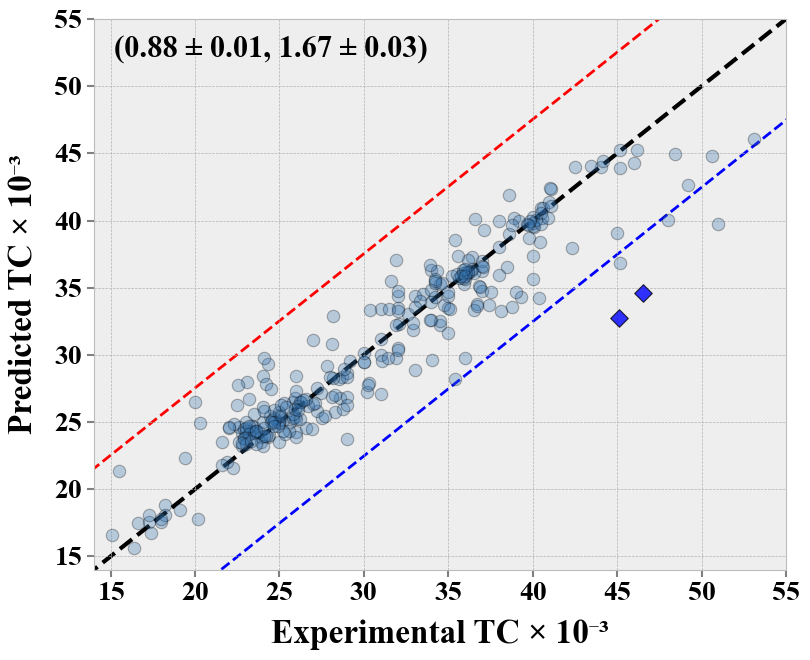

In [106]:
# 计算误差
errors = np.abs(all_predictions - all_actuals)

# 按误差降序排序索引（最大误差在最后）
sorted_idx = np.argsort(errors)

# 指定你要高亮的“误差排名”
selected_ranks = [0, 1 ] 

# 获取对应的点索引（去重）
highlight_idx = list({sorted_idx[-(r + 1)] for r in selected_ranks})

# 其他点索引
others_idx = np.setdiff1d(np.arange(len(all_actuals)), highlight_idx)

# 构建理想线
sigma = np.std(all_actuals)
# 构建理想线的x和y值
min_val = min(all_actuals.min(), all_predictions.min())
max_val = max(all_actuals.max(), all_predictions.max())
# 设置理想线和偏差带用的横坐标范围，覆盖整个图像范围
x_vals = np.linspace(min_val - 20, max_val + 20, 100)
y_vals = x_vals
ci_upper = y_vals + 1.0 * sigma
ci_lower = y_vals - 1.0 * sigma

# 绘图
plt.figure(figsize=(8.5, 7))
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['font.size'] = 20
plt.style.use('bmh')

# 偏差带线和理想线
plt.plot(x_vals, ci_upper, color='red', linestyle='--', linewidth=2, zorder=1, label='±1.5σ upper')
plt.plot(x_vals, ci_lower, color='blue', linestyle='--', linewidth=2, zorder=1, label='±1.5σ lower')
plt.plot(x_vals, y_vals, 'k--', lw=3, zorder=1, label='Ideal: y = x')

# 画其他点（不在top3）
plt.scatter(all_actuals[others_idx], all_predictions[others_idx],
            alpha=0.3, marker='o', color='#3574B1', edgecolors='black',
            linewidths=0.8, s=80, zorder=2)
# 分别画 highlight_idx 中在上方和下方的点
existing_labels = set()
for i in highlight_idx:
    if all_predictions[i] > all_actuals[i]:
        color = 'red'
        label = 'Top error (above)'
    else:
        color = '#0000FF'
        label = 'Top error (below)'

    # 避免图例重复
    label = label if label not in existing_labels else None
    if label:
        existing_labels.add(label)

    plt.scatter(all_actuals[i], all_predictions[i],
                color=color, marker='D', edgecolors='black', alpha=0.8,
                linewidths=0.8, s=80, zorder=3, label=label)
# R² 和 RMSE 注释
plt.text(0.03, 0.93, f'({result["r2_val"]}, {result["mae_val"]})',
         fontsize=22, transform=plt.gca().transAxes)

# 标签和样式
plt.xlabel('Experimental TC × 10⁻³', weight='bold', fontsize=24, fontname='Times New Roman', labelpad=10)
plt.ylabel('Predicted TC × 10⁻³', weight='bold', fontsize=24, fontname='Times New Roman', labelpad=10)
plt.xticks(fontsize=20, weight='bold', )
plt.yticks(fontsize=20, weight='bold')
plt.tick_params(axis='both', which='both', direction='out', length=5, width=1.5, color='gray', bottom=True, top=False, left=True, right=False)

# 保证横纵坐标范围一致
min_val = min(all_actuals.min(), all_predictions.min())
max_val = max(all_actuals.max(), all_predictions.max())
start = np.floor(min_val -1)
end = np.ceil(max_val + 1)

plt.xlim(start, end)
plt.ylim(start, end)

# 设置相同的坐标轴刻度间隔
tick_interval = 5 # 你也可以改为其他，如 5、20 等
ticks = np.arange(start+1, end + tick_interval, tick_interval)
plt.xticks(ticks)
plt.yticks(ticks)

plt.tight_layout()
plt.savefig(os.path.join(folder_path, 'TC-预测图.png'), dpi=600, bbox_inches='tight')
plt.show()

In [107]:
df_errors = pd.DataFrame({
    'Index': all_indices,
    'Actual': all_actuals,
    'Predicted': all_predictions
})
df_errors['Residuals'] = df_errors['Actual'] - df_errors['Predicted']
df_errors['Abs_Residuals'] = np.abs(df_errors['Residuals'])

# 排序
df_sorted = df_errors.sort_values(by='Abs_Residuals', ascending=False)
df_sorted.head(20)

,Index,Actual,Predicted,Residuals,Abs_Residuals
200,27,45.10,32.763480,12.336520,12.336520
16,36,46.56,34.630927,11.929073,11.929073
101,13,51.00,39.710543,11.289457,11.289457
105,42,45.16,36.836078,8.323922,8.323922
261,201,48.02,40.006636,8.013364,8.013364
201,34,35.40,28.216754,7.183246,7.183246
115,64,53.10,46.062454,7.037546,7.037546
204,41,49.19,42.643031,6.546969,6.546969
226,106,20.00,26.526762,-6.526762,6.526762
162,197,36.00,29.744293,6.255707,6.255707


In [108]:
df_top_actual = df.loc[df_sorted['Index'].head(15)]
df_top_actual

,DIPOCE,DI_NCO,PO_HV,PO_f,BA_Code,BA_Mn,PO_Phr,BA_Phr,FS_Phr,Cata_Phr,...,R,CHS,AB_Mix_t,Q,Cata_Code,MCS,TC_Method,TC_T,Closed_CC,TC
27,0110000000,31.000,430.000000,6.411677,1000,18.000,62.500000,1.250000,1.600000,0.620000,...,1.50,61.540000,8.00,648.00000,010000,257.586,0,297.070,81.2031,45.10
36,0110000000,31.250,450.000000,3.207685,1000,18.000,77.869976,2.041297,1.557400,3.114799,...,1.05,57.265557,16.74,0.00000,100100,310.124,3,300.400,78.6704,46.56
13,0101010000,31.400,406.460651,3.175917,1000,18.000,66.000000,2.000000,1.650000,0.700000,...,1.10,55.500000,12.26,0.00000,101000,237.300,1,298.150,47.0000,51.00
42,0100100000,31.250,474.306026,2.728037,1000,18.000,52.761554,12.623780,1.678115,0.865386,...,1.05,38.567649,14.15,0.00000,100100,248.000,3,292.770,68.8159,45.16
201,0100010000,31.400,211.000000,2.000000,1000,18.000,83.851114,1.677022,0.419256,1.467394,...,1.10,54.391838,10.00,336.00000,100000,20.000,1,298.150,57.0800,48.02
34,0110100000,31.500,407.364978,4.939180,1000,18.000,80.000000,2.160000,2.400000,0.800000,...,1.30,55.560000,10.00,48.36671,100000,566.000,1,283.150,81.0000,35.40
64,0100100000,30.000,531.800000,6.000000,1000,18.000,62.500000,1.250000,1.440000,2.200000,...,1.20,61.500000,14.66,164.94519,100000,384.574,1,298.150,62.0554,53.10
41,0100100000,31.250,464.498610,2.693037,1000,18.000,47.776480,12.197475,1.665815,0.897702,...,1.05,38.576649,15.50,0.00000,100100,378.000,3,298.220,65.6230,49.19
106,0100010000,31.000,445.000000,3.237404,0001,70.100,91.000000,18.200000,1.800000,0.910000,...,0.94,52.400000,15.00,1368.00000,100000,487.050,1,293.165,93.0000,20.00
197,0110010000,31.400,572.554744,5.154015,1000,18.000,80.554213,1.611084,0.402771,0.805542,...,1.10,55.385027,12.00,161.16038,101000,265.000,1,298.150,83.9200,36.00


In [109]:
df = pd.read_csv("TC_填充.csv")
X = df.drop(["TC"], axis=1)
# 创建一个SHAP解释器
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X, check_additivity=False)
shap_values

array([[ 2.20020713e-02, -1.37029076e-01, -2.64211962e-02, ...,
        -5.35632081e-02, -5.85710457e-01, -3.62845357e+00],
       [ 6.18677487e-02,  1.52425618e-02,  1.10403355e-01, ...,
        -7.22812698e-04,  1.70042174e-02, -3.73380938e+00],
       [ 2.57096942e-02,  3.13243418e-03,  1.38188121e-01, ...,
        -3.71785834e-02,  4.38120008e-02, -3.13412893e+00],
       ...,
       [ 2.61115210e-01,  1.49262394e-01,  9.12425289e-02, ...,
         6.14943599e-02, -8.73887824e-01,  7.07321109e+00],
       [ 2.66097991e-01,  1.83362497e-01,  8.57048095e-02, ...,
         7.54275449e-02, -8.38690850e-01,  7.16037676e+00],
       [ 2.80897403e-01,  1.95331973e-01,  8.25927541e-02, ...,
         7.84916570e-02, -8.27344073e-01,  7.13129466e+00]],
      shape=(288, 22))

In [110]:
import shap
import os
import matplotlib.pyplot as plt

# 设置字体和样式
plt.rcParams["font.family"] = "Times New Roman"
plt.style.use('default')

# 创建主图
fig, ax1 = plt.subplots(figsize=(10, 8), dpi=1200)

# 蜂巢图（dot plot）
feature_names = [name.replace("f(H2O)", "f(H₂O)") for name in X.columns]
shap.summary_plot(shap_values, X, feature_names=feature_names, plot_type="dot", show=False, color_bar=False, max_display=22)
plt.gca().set_position([0.2, 0.2, 0.65, 0.65])  # 调整位置为主图 ax1
ax1 = plt.gca()

# 顶部条形图（bar plot）
ax2 = ax1.twiny()
shap.summary_plot(shap_values, X, feature_names=feature_names, plot_type="bar", show=False, max_display=22)
plt.gca().set_position([0.2, 0.2, 0.65, 0.65])  # 确保对齐
for bar in ax2.patches:
    # bar.set_facecolor("skyblue")
    bar.set_alpha(0.2)

# 添加灰色参考线
ax2.axhline(y=22, color='black', linestyle='-', linewidth=2)

# 坐标轴标签设置,新罗马字体
ax1.set_xlabel('Shapley Value Contribution', fontsize=22, labelpad=10, weight='bold', fontname='Times New Roman')
ax1.set_ylabel('Features', fontsize=22, labelpad=10, weight='bold', fontname='Times New Roman')

ax2.set_xlabel('Mean (|Shapley Value|)', fontsize=22, labelpad=10, weight='bold', fontname='Times New Roman')
ax2.xaxis.set_label_position('top')
ax2.xaxis.tick_top()

# 设置刻度字体大小和粗细
for label in ax1.get_xticklabels() + ax1.get_yticklabels():
    label.set_fontsize(18)
    label.set_fontweight('bold')
    label.set_fontname('Times New Roman')

for label in ax2.get_xticklabels():
    label.set_fontsize(18)
    label.set_fontweight('bold')
    label.set_fontname('Times New Roman')
# 边框
for spine in ['left',  'bottom']:
    ax1.spines[spine].set_visible(True)
    ax1.spines[spine].set_edgecolor('black')
    ax1.spines[spine].set_linewidth(1.5)

# 刻度线
ax1.tick_params(axis='both', direction='out', colors='black', width=1.5, length=5)
ax2.tick_params(axis='x', direction='out', colors='black', width=1.5, length=5)
# ax1.set_xlim(-0.18, 0.16)
ax2.set_xlim(0, 4)
# ax1.set_xticks(np.linspace(-0.15, 0.15, 5))
ax2.set_xticks(np.linspace(0, 4, 5))

# 调整排版，保存并展示
plt.tight_layout()
plt.savefig(os.path.join(folder_path, 'TC_SHAP.png'), dpi=600, bbox_inches='tight')
plt.show()
